<a href="https://colab.research.google.com/github/lucasmoratof/stock_projects/blob/master/Stock_Analysis_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Stock Analysis

In this notebook you will find the basic steps to start an stock analysis:

- How to have acess to share's data
- Which share price to use and why;
- Plot a time series of your data;

Let's get rich?

In [0]:
# inviting our friends to the party:
import pandas as pd
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [0]:
# Now let's define a range, that means, from when until when we want the data:
start_date= datetime.datetime(2005, 1, 1) # the format is YYYY-MM-DD
end_date= datetime.datetime(2019, 12, 31)

In [0]:
# We will use data from Google and Microsoft in our analysis
google= web.DataReader("GOOG", 'yahoo', start_date, end_date)
microsoft= web.DataReader('MSFT', 'yahoo', start_date, end_date)

In [17]:
google.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,101.439781,97.365051,98.331429,100.976517,31807000.0,100.976517
2005-01-04,101.086105,96.378746,100.323959,96.886841,27614900.0,96.886841


In [18]:
microsoft.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,26.950001,26.65,26.799999,26.74,65002900.0,19.400494
2005-01-04,27.100000,26.66,26.870001,26.84,109442100.0,19.473045


You may have noted that we have different columns here. We are interested in comparing the closing prices during the period we selected. We will use the Adjusted Close price, as it represents a more accurate way to measure a stock price, as it takes into account factors like dividends and stock splits.

Source: https://budgeting.thenest.com/adjusted-closing-price-vs-closing-price-32457.html

In [0]:
# deleting all columns and keeping just the date and adjusted close price 
goog_close= google.drop(google.columns[0:5], axis=1)
msft_close= microsoft.drop(microsoft.columns[0:5], axis=1) 

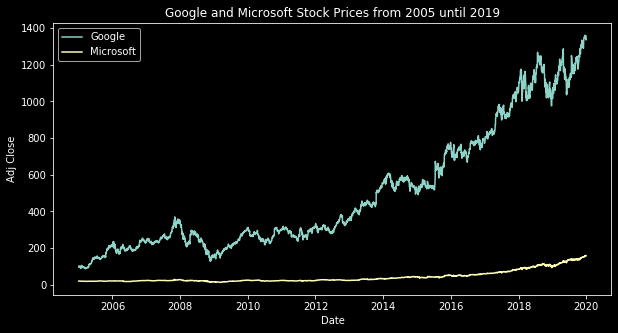

In [9]:
# let's visualize in a line plot how our stocks performed overtime 

# Adjusting the style 
style.use('dark_background')
plt.figure(figsize=(10,5))
ax1= sns.lineplot(x=goog_close.index, y= goog_close['Adj Close'], label='Google')

ax2= sns.lineplot(x=msft_close.index, y=msft_close['Adj Close'], label='Microsoft');

plt.title("Google and Microsoft Stock Prices from 2005 until 2019")

plt.legend()

plt.show()

The graph above give a wrong impression that Microsoft prices have a very small volatility. This is due the fact that the stock price between Google and Microsoft are in different magnitudes. It is best practice to keep them separate so we can visualize the real picture of the price changing over time. 

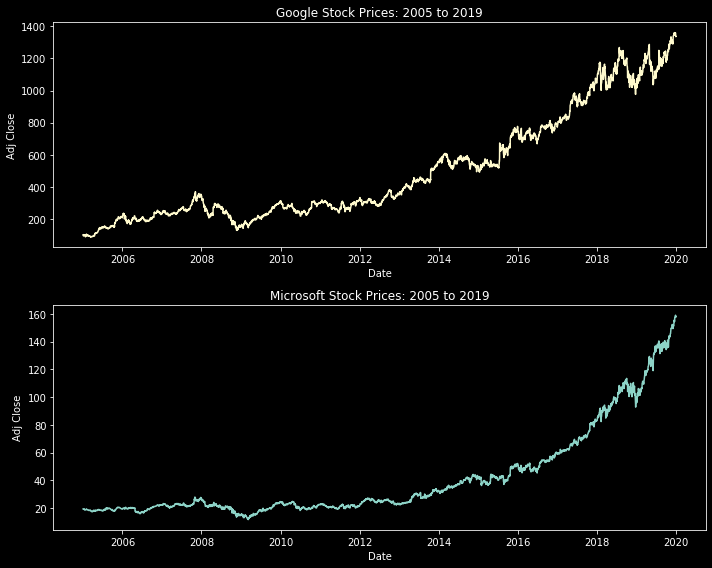

In [16]:
# let's visualize in a line plot how our stocks performed overtime 

# Adjusting the style 
style.use('dark_background')
# setting the size of the figure
plt.figure(figsize=(10,8))
# on the subplot, we define how many rows and columns our figure will have)
plt.subplot(2, 1, 1)
sns.lineplot(x=goog_close.index, y= goog_close['Adj Close'], color= 'lemonchiffon')
plt.title('Google Stock Prices: 2005 to 2019')

plt.subplot(2, 1, 2)
ax2= sns.lineplot(x=msft_close.index, y=msft_close['Adj Close'])
plt.title('Microsoft Stock Prices: 2005 to 2019')
# with the code below, we avoid overlaping and the semicolumn avoid messages
plt.tight_layout();